In [0]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MeanShift, estimate_bandwidth

from sklearn.cluster import KMeans
from datetime import datetime

In [0]:
iris = pd.read_csv("iris.data", header=None)
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [0]:
iris.head(5).append(iris.tail(5))

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
iris.columns = names
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
# https://stackoverflow.com/a/18364570
def get_columns_bins(column_name):
  all_bins = []
  
  for method in bins_methods:
    start = datetime.now()
    hist, bin_edges = np.histogram(column_name,bins=method)
    all_bins.append(bin_edges)
    print("Method : {:<7} - Running Time : {:<5} - Number of bins : {:<5} - Head : {} - Tail : {}".format(method,str(datetime.now()-start), len(bin_edges), bin_edges[:3], bin_edges[-3:-1]))
  return all_bins

In [0]:
# https://stackoverflow.com/a/18364570
def get_clustering_bins(s, quantile=0.3, n_samples=None):
    
    series = s.dropna().values.reshape(-1, 1)
    
    bandwidth = estimate_bandwidth(series, quantile=quantile, n_samples=n_samples)
    clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(series)

    d = pd.DataFrame(columns=['data_column', 'label_column'])

    d['data_column'] = series.reshape(-1)
    d['label_column'] = clustering.labels_
    
    sorted_vals = d.groupby('label_column')['data_column'].max().sort_values().values
    bins = np.insert(sorted_vals, [0] , [series.min()-1])
    bins[-1] = bins[-1] + 1
    
    return bins, range(bins.size-1) 

In [0]:
bins_methods = [ "auto", "fd", "doane", "scott", "stone", "rice", "sturges", "sqrt"]

In [0]:
all_bins_sepal_length = []
all_bins_sepal_length = get_columns_bins(iris.sepal_length)

Method : auto    - Running Time : 0:00:00.002164 - Number of bins : 10    - Head : [4.3 4.7 5.1] - Tail : [7.1 7.5]
Method : fd      - Running Time : 0:00:00.000655 - Number of bins : 9     - Head : [4.3  4.75 5.2 ] - Tail : [7.   7.45]
Method : doane   - Running Time : 0:00:00.000556 - Number of bins : 11    - Head : [4.3  4.66 5.02] - Tail : [7.18 7.54]
Method : scott   - Running Time : 0:00:00.000558 - Number of bins : 8     - Head : [4.3        4.81428571 5.32857143] - Tail : [6.87142857 7.38571429]
Method : stone   - Running Time : 0:00:00.016018 - Number of bins : 101   - Head : [4.3   4.336 4.372] - Tail : [7.828 7.864]
Method : rice    - Running Time : 0:00:00.000721 - Number of bins : 12    - Head : [4.3        4.62727273 4.95454545] - Tail : [7.24545455 7.57272727]
Method : sturges - Running Time : 0:00:00.000395 - Number of bins : 10    - Head : [4.3 4.7 5.1] - Tail : [7.1 7.5]
Method : sqrt    - Running Time : 0:00:00.000280 - Number of bins : 14    - Head : [4.3        4.5

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/mean_shift_.py:291: UserWarning: Binning data failed with provided bin_size=0.400000, using data points as seeds.
  " using data points as seeds." % bin_size)


array([3.3, 4.3, 4.7, 5.5, 5.9, 6.7, 7.5, 8.9])

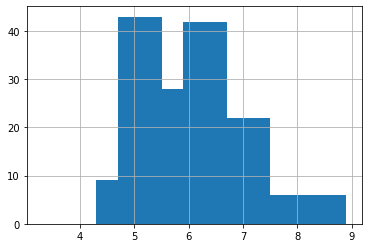

In [0]:
sepal_length_bin,label = get_clustering_bins(pd.Series(all_bins_sepal_length[0]), quantile=0.2, n_samples=10)
iris.sepal_length.hist(bins=sepal_length_bin)
sepal_length_bin

In [0]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
len(sepal_length_bin) , iris.sepal_length.value_counts(bins=sepal_length_bin)

(8, (4.7, 5.5]      48
 (5.9, 6.7]      47
 (5.5, 5.9]      24
 (6.7, 7.5]      14
 (4.3, 4.7]      10
 (7.5, 8.9]       6
 (3.299, 4.3]     1
 Name: sepal_length, dtype: int64)

In [0]:
iris_V2 = iris.copy()

In [0]:
iris_V2['sepal_length_category'] = pd.cut(iris_V2.sepal_length, sepal_length_bin).cat.codes
iris_V2.head(5).append(iris_V2.tail(5))

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_category
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,2
145,6.7,3.0,5.2,2.3,Iris-virginica,4
146,6.3,2.5,5.0,1.9,Iris-virginica,4
147,6.5,3.0,5.2,2.0,Iris-virginica,4
148,6.2,3.4,5.4,2.3,Iris-virginica,4
149,5.9,3.0,5.1,1.8,Iris-virginica,3


In [0]:
all_bins_sepal_width = []
all_bins_sepal_width = get_columns_bins(iris.sepal_width)

Method : auto    - Running Time : 0:00:00.001042 - Number of bins : 14    - Head : [2.         2.18461538 2.36923077] - Tail : [4.03076923 4.21538462]
Method : fd      - Running Time : 0:00:00.002732 - Number of bins : 14    - Head : [2.         2.18461538 2.36923077] - Tail : [4.03076923 4.21538462]
Method : doane   - Running Time : 0:00:00.002525 - Number of bins : 11    - Head : [2.   2.24 2.48] - Tail : [3.92 4.16]
Method : scott   - Running Time : 0:00:00.001796 - Number of bins : 10    - Head : [2.         2.26666667 2.53333333] - Tail : [3.86666667 4.13333333]
Method : stone   - Running Time : 0:00:00.012526 - Number of bins : 101   - Head : [2.    2.024 2.048] - Tail : [4.352 4.376]
Method : rice    - Running Time : 0:00:00.000491 - Number of bins : 12    - Head : [2.         2.21818182 2.43636364] - Tail : [3.96363636 4.18181818]
Method : sturges - Running Time : 0:00:00.000443 - Number of bins : 10    - Head : [2.         2.26666667 2.53333333] - Tail : [3.86666667 4.13333333

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


array([1.        , 2.18461538, 2.55384615, 2.92307692, 3.29230769,
       3.66153846, 4.03076923, 5.4       ])

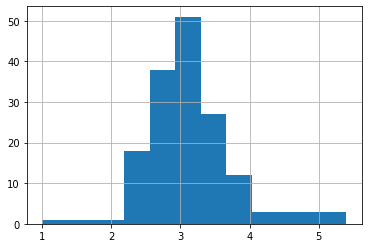

In [0]:
sepal_width_bin,label = get_clustering_bins(pd.Series(all_bins_sepal_width[0]), quantile=0.2, n_samples=10)
iris.sepal_width.hist(bins=sepal_width_bin)
sepal_width_bin

In [0]:
len(sepal_width_bin) , iris.sepal_width.value_counts(bins=sepal_width_bin)

(8, (2.923, 3.292]    51
 (2.554, 2.923]    38
 (3.292, 3.662]    27
 (2.185, 2.554]    18
 (3.662, 4.031]    12
 (4.031, 5.4]       3
 (0.999, 2.185]     1
 Name: sepal_width, dtype: int64)

In [0]:
iris_V2['sepal_width_category'] = pd.cut(iris_V2.sepal_width, sepal_width_bin).cat.codes
iris_V2.head(5).append(iris_V2.tail(5))

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_category,sepal_width_category
0,5.1,3.5,1.4,0.2,Iris-setosa,2,4
1,4.9,3.0,1.4,0.2,Iris-setosa,2,3
2,4.7,3.2,1.3,0.2,Iris-setosa,1,3
3,4.6,3.1,1.5,0.2,Iris-setosa,1,3
4,5.0,3.6,1.4,0.2,Iris-setosa,2,4
145,6.7,3.0,5.2,2.3,Iris-virginica,4,3
146,6.3,2.5,5.0,1.9,Iris-virginica,4,1
147,6.5,3.0,5.2,2.0,Iris-virginica,4,3
148,6.2,3.4,5.4,2.3,Iris-virginica,4,4
149,5.9,3.0,5.1,1.8,Iris-virginica,3,3


In [0]:
all_bins_petal_length = []
all_bins_petal_length = get_columns_bins(iris.petal_length)

Method : auto    - Running Time : 0:00:00.001775 - Number of bins : 10    - Head : [1.         1.65555556 2.31111111] - Tail : [5.58888889 6.24444444]
Method : fd      - Running Time : 0:00:00.003335 - Number of bins : 6     - Head : [1.   2.18 3.36] - Tail : [4.54 5.72]
Method : doane   - Running Time : 0:00:00.000768 - Number of bins : 11    - Head : [1.   1.59 2.18] - Tail : [5.72 6.31]
Method : scott   - Running Time : 0:00:00.000492 - Number of bins : 7     - Head : [1.         1.98333333 2.96666667] - Tail : [4.93333333 5.91666667]
Method : stone   - Running Time : 0:00:00.013441 - Number of bins : 101   - Head : [1.    1.059 1.118] - Tail : [6.782 6.841]
Method : rice    - Running Time : 0:00:00.000599 - Number of bins : 12    - Head : [1.         1.53636364 2.07272727] - Tail : [5.82727273 6.36363636]
Method : sturges - Running Time : 0:00:00.000415 - Number of bins : 10    - Head : [1.         1.65555556 2.31111111] - Tail : [5.58888889 6.24444444]
Method : sqrt    - Running T

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/mean_shift_.py:291: UserWarning: Binning data failed with provided bin_size=0.655556, using data points as seeds.
  " using data points as seeds." % bin_size)


array([0.        , 1.        , 1.65555556, 2.31111111, 2.96666667,
       3.62222222, 4.27777778, 4.93333333, 6.24444444, 7.9       ])

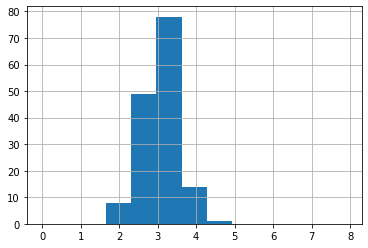

In [0]:
petal_length_bin,label = get_clustering_bins(pd.Series(all_bins_petal_length[0]), quantile=0.2, n_samples=10)
iris.sepal_width.hist(bins=petal_length_bin)
petal_length_bin

In [0]:
len(petal_length_bin) , iris.sepal_width.value_counts(bins=petal_length_bin)

(10, (2.967, 3.622]    78
 (2.311, 2.967]    49
 (3.622, 4.278]    14
 (1.656, 2.311]     8
 (4.278, 4.933]     1
 (6.244, 7.9]       0
 (4.933, 6.244]     0
 (1.0, 1.656]       0
 (-0.001, 1.0]      0
 Name: sepal_width, dtype: int64)

In [0]:
iris_V2['petal_length_category'] = pd.cut(iris_V2.petal_length, petal_length_bin).cat.codes
iris_V2.head(5).append(iris_V2.tail(5))

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_category,sepal_width_category,petal_length_category
0,5.1,3.5,1.4,0.2,Iris-setosa,2,4,1
1,4.9,3.0,1.4,0.2,Iris-setosa,2,3,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,3,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,3,1
4,5.0,3.6,1.4,0.2,Iris-setosa,2,4,1
145,6.7,3.0,5.2,2.3,Iris-virginica,4,3,7
146,6.3,2.5,5.0,1.9,Iris-virginica,4,1,7
147,6.5,3.0,5.2,2.0,Iris-virginica,4,3,7
148,6.2,3.4,5.4,2.3,Iris-virginica,4,4,7
149,5.9,3.0,5.1,1.8,Iris-virginica,3,3,7


In [0]:
all_bins_petal_width = []
all_bins_petal_width = get_columns_bins(iris.petal_width)

Method : auto    - Running Time : 0:00:00.001027 - Number of bins : 10    - Head : [0.1        0.36666667 0.63333333] - Tail : [1.96666667 2.23333333]
Method : fd      - Running Time : 0:00:00.000750 - Number of bins : 6     - Head : [0.1  0.58 1.06] - Tail : [1.54 2.02]
Method : doane   - Running Time : 0:00:00.000675 - Number of bins : 10    - Head : [0.1        0.36666667 0.63333333] - Tail : [1.96666667 2.23333333]
Method : scott   - Running Time : 0:00:00.000496 - Number of bins : 6     - Head : [0.1  0.58 1.06] - Tail : [1.54 2.02]
Method : stone   - Running Time : 0:00:00.018801 - Number of bins : 101   - Head : [0.1   0.124 0.148] - Tail : [2.452 2.476]
Method : rice    - Running Time : 0:00:00.000429 - Number of bins : 12    - Head : [0.1        0.31818182 0.53636364] - Tail : [2.06363636 2.28181818]
Method : sturges - Running Time : 0:00:00.000432 - Number of bins : 10    - Head : [0.1        0.36666667 0.63333333] - Tail : [1.96666667 2.23333333]
Method : sqrt    - Running T

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/mean_shift_.py:291: UserWarning: Binning data failed with provided bin_size=0.266667, using data points as seeds.
  " using data points as seeds." % bin_size)


array([-0.9       ,  0.1       ,  0.36666667,  0.63333333,  0.9       ,
        1.16666667,  1.43333333,  1.7       ,  1.96666667,  3.5       ])

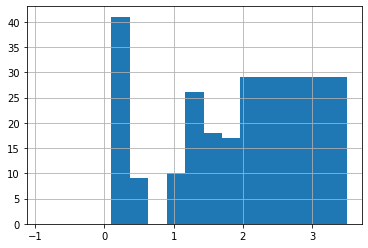

In [0]:
petal_width_bin,label = get_clustering_bins(pd.Series(all_bins_petal_width[0]), quantile=0.2, n_samples=10)
iris.petal_width.hist(bins=petal_width_bin)
petal_width_bin

In [0]:
len(petal_width_bin) , iris.petal_width.value_counts(bins=petal_width_bin)

(10, (0.1, 0.367]      35
 (1.967, 3.5]      29
 (1.167, 1.433]    26
 (1.433, 1.7]      18
 (1.7, 1.967]      17
 (0.9, 1.167]      10
 (0.367, 0.633]     9
 (-0.901, 0.1]      6
 (0.633, 0.9]       0
 Name: petal_width, dtype: int64)

In [0]:
iris_V2['petal_width_category'] = pd.cut(iris_V2.petal_width, petal_width_bin).cat.codes
iris_V2.head(5).append(iris_V2.tail(5))

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_category,sepal_width_category,petal_length_category,petal_width_category
0,5.1,3.5,1.4,0.2,Iris-setosa,2,4,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,2,3,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,3,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,3,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,2,4,1,1
145,6.7,3.0,5.2,2.3,Iris-virginica,4,3,7,8
146,6.3,2.5,5.0,1.9,Iris-virginica,4,1,7,7
147,6.5,3.0,5.2,2.0,Iris-virginica,4,3,7,8
148,6.2,3.4,5.4,2.3,Iris-virginica,4,4,7,8
149,5.9,3.0,5.1,1.8,Iris-virginica,3,3,7,7


In [0]:
x = iris_V2.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_length_category', 'sepal_width_category', 'petal_length_category', 'petal_width_category']].values

# **Clustering with Kmeans++ as a init parameter**



In [0]:
kmeans_kmeans_plus = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 100, random_state = 1)
y_kmeans_1 = kmeans_kmeans_plus.fit_predict(x)

In [0]:
kmeans_kmeans_plus.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [0]:
iris_V2['kmeans_plus_labels'] = kmeans_kmeans_plus.labels_
iris_V2.head()

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_category,sepal_width_category,petal_length_category,petal_width_category,kmeans_plus_labels
0,5.1,3.5,1.4,0.2,Iris-setosa,2,4,1,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,2,3,1,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,3,1,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,3,1,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,2,4,1,1,0


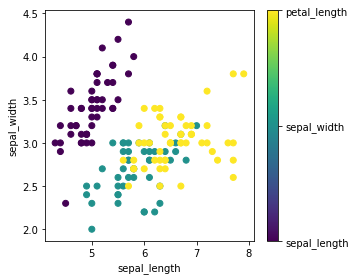

In [0]:
# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris_V2.columns[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris_V2.iloc[:, x_index], iris_V2.iloc[:, y_index], c=iris_V2.kmeans_plus_labels)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris_V2.columns[x_index])
plt.ylabel(iris_V2.columns[y_index])

plt.tight_layout()
plt.show()

In [0]:
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D

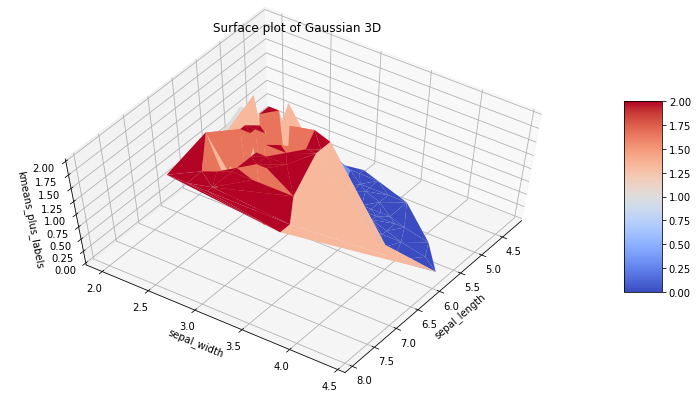

In [0]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_trisurf(iris_V2.sepal_length, iris_V2.sepal_width, iris_V2.kmeans_plus_labels, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('kmeans_plus_labels')
ax.set_title('Surface plot of Gaussian 3D')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

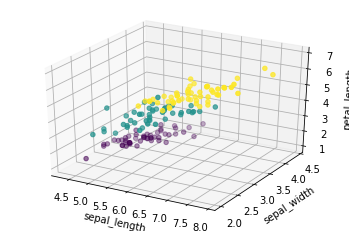

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(iris_V2.sepal_length, iris_V2.sepal_width, iris_V2.petal_length, c=iris_V2.kmeans_plus_labels)

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')

plt.show()

# **Clustering with Random as a init parameter**



In [0]:
kmeans_random = KMeans(n_clusters = 3, init = 'random', max_iter = 100, n_init = 100, random_state = 1)
y_kmeans_2 = kmeans_random.fit_predict(x)

In [0]:
y_kmeans_2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [0]:
kmeans_random.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [0]:
iris_V2['kmeans_random_labels'] = kmeans_random.labels_
iris_V2.head()

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_category,sepal_width_category,petal_length_category,petal_width_category,kmeans_plus_labels,kmeans_random_labels
0,5.1,3.5,1.4,0.2,Iris-setosa,2,4,1,1,0,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2,3,1,1,0,2
2,4.7,3.2,1.3,0.2,Iris-setosa,1,3,1,1,0,2
3,4.6,3.1,1.5,0.2,Iris-setosa,1,3,1,1,0,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2,4,1,1,0,2


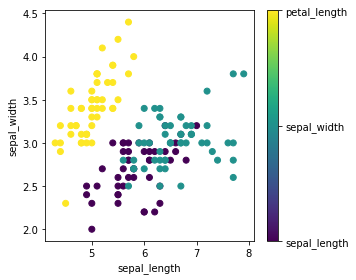

In [0]:
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris_V2.columns[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris_V2.iloc[:, x_index], iris_V2.iloc[:, y_index], c=iris_V2.kmeans_random_labels)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris_V2.columns[x_index])
plt.ylabel(iris_V2.columns[y_index])

plt.tight_layout()
plt.show()

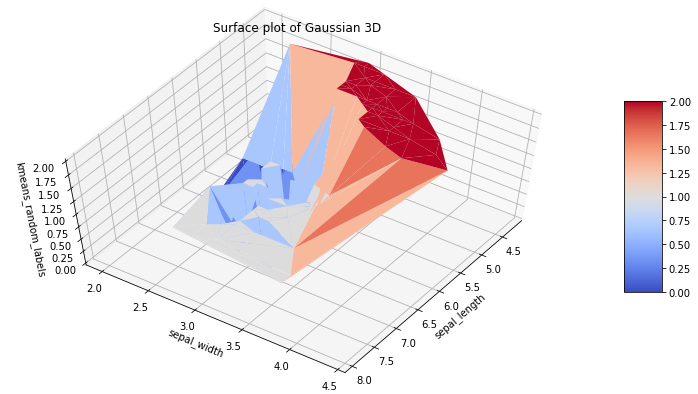

In [0]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_trisurf(iris_V2.sepal_length, iris_V2.sepal_width, iris_V2.kmeans_random_labels, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('kmeans_random_labels')
ax.set_title('Surface plot of Gaussian 3D')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

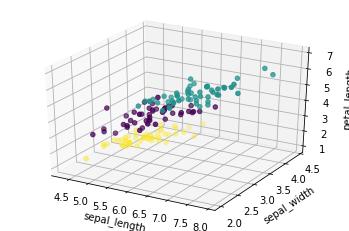

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(iris_V2.sepal_length, iris_V2.sepal_width, iris_V2.petal_length, c=iris_V2.kmeans_random_labels)

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')

plt.show()

# **Clustering with ndarray (mean, gmean and min) as a init parameter**



In [0]:
iris.columns , iris_V2.columns

(Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class',
        'sepal_length_category', 'sepal_width_category',
        'petal_length_category', 'petal_width_category'],
       dtype='object'),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class',
        'sepal_length_category', 'sepal_width_category',
        'petal_length_category', 'petal_width_category', 'kmeans_plus_labels',
        'kmeans_random_labels'],
       dtype='object'))

In [0]:
iris['sepal_length_category'] = iris_V2.sepal_length_category
iris['sepal_width_category'] = iris_V2.sepal_width_category
iris['petal_length_category'] = iris_V2.petal_length_category
iris['petal_width_category'] = iris_V2.petal_width_category

In [0]:
sepal_length_avg = np.mean(iris.sepal_length)
sepal_width_avg = np.mean(iris.sepal_width)
petal_length_avg = np.mean(iris.petal_length)
petal_width_avg = np.mean(iris.petal_width)

sepal_length_category_avg = np.mean(iris.sepal_length_category)
sepal_width_category_avg = np.mean(iris.sepal_width_category)
petal_length_category_avg = np.mean(iris.petal_length_category)
petal_width_category_avg = np.mean(iris.petal_width_category)

In [0]:
# calculate geometric mean
from scipy import stats

In [0]:
sepal_length_g_avg = stats.gmean(iris.sepal_length)
sepal_width_g_avg = stats.gmean(iris.sepal_width)
petal_length_g_avg = stats.gmean(iris.petal_length)
petal_width_g_avg = stats.gmean(iris.petal_width)

sepal_length_category_g_avg = stats.gmean(iris.sepal_length_category)
sepal_width_category_g_avg = stats.gmean(iris.sepal_width_category)
petal_length_category_g_avg = stats.gmean(iris.petal_length_category)
petal_width_category_g_avg = stats.gmean(iris.petal_width_category)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:324: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [0]:
sepal_length_min = np.min(iris.sepal_length)
sepal_width_min = np.min(iris.sepal_width)
petal_length_min = np.min(iris.petal_length)
petal_width_min = np.min(iris.petal_width)

sepal_length_category_min = np.min(iris.sepal_length_category)
sepal_width_category_min = np.min(iris.sepal_width_category)
petal_length_category_min = np.min(iris.petal_length_category)
petal_width_category_min = np.min(iris.petal_width_category)

In [0]:
ndarray_for_iris = np.array([(sepal_length_avg , sepal_width_avg , petal_length_avg, petal_width_avg, sepal_length_category_avg, sepal_width_category_avg, petal_length_category_avg, petal_width_category_avg),
                     (sepal_length_g_avg, sepal_width_g_avg, petal_length_g_avg, petal_width_g_avg, sepal_length_category_g_avg, sepal_width_category_g_avg, petal_length_category_g_avg, petal_width_category_g_avg),
                     (sepal_length_min, sepal_width_min, petal_length_min, petal_width_min, sepal_length_category_min, sepal_width_category_min, petal_length_category_min, petal_width_category_min)])

In [0]:
ndarray_for_iris


array([[5.84333333, 3.054     , 3.75866667, 1.19866667, 3.14666667,
        2.88666667, 4.52      , 4.54666667],
       [5.78572039, 3.0235822 , 3.23975664, 0.83782701, 0.        ,
        0.        , 0.        , 0.        ],
       [4.3       , 2.        , 1.        , 0.1       , 0.        ,
        0.        , 0.        , 0.        ]])

In [0]:
kmeans_ndarray = KMeans(n_clusters = 3, init = ndarray_for_iris, max_iter = 100, n_init = 100, random_state = 1)
y_kmeans_3 = kmeans_ndarray.fit_predict(x)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=100
  return_n_iter=True)


In [0]:
kmeans_ndarray.labels_

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [0]:
iris_V2['kmeans_ndarray_labels'] = kmeans_ndarray.labels_

In [0]:
iris_V2.head(2).append(iris_V2.tail(2))

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_category,sepal_width_category,petal_length_category,petal_width_category,kmeans_plus_labels,kmeans_random_labels,kmeans_ndarray_labels
0,5.1,3.5,1.4,0.2,Iris-setosa,2,4,1,1,0,2,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2,3,1,1,0,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,4,4,7,8,2,1,0
149,5.9,3.0,5.1,1.8,Iris-virginica,3,3,7,7,2,1,0


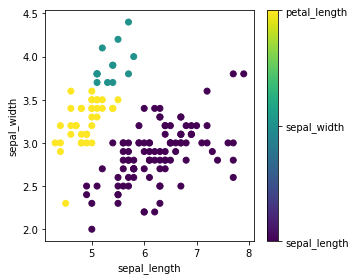

In [0]:
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris_V2.columns[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris_V2.iloc[:, x_index], iris_V2.iloc[:, y_index], c=iris_V2.kmeans_ndarray_labels)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris_V2.columns[x_index])
plt.ylabel(iris_V2.columns[y_index])

plt.tight_layout()
plt.show()

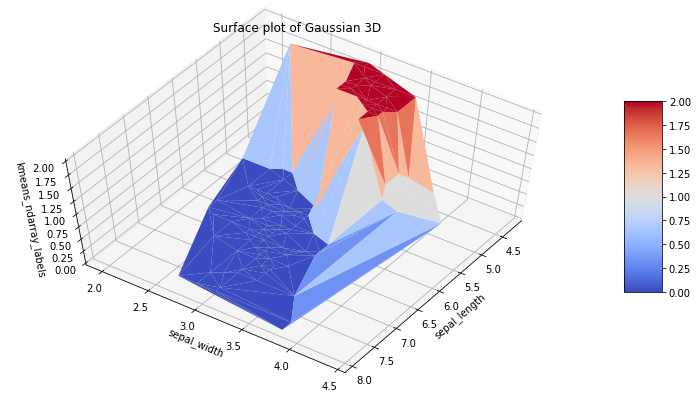

In [0]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_trisurf(iris_V2.sepal_length, iris_V2.sepal_width, iris_V2.kmeans_ndarray_labels, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('kmeans_ndarray_labels')
ax.set_title('Surface plot of Gaussian 3D')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

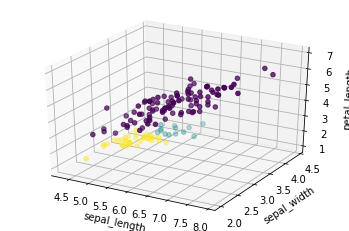

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(iris_V2.sepal_length, iris_V2.sepal_width, iris_V2.petal_length, c=iris_V2.kmeans_ndarray_labels)

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')

plt.show()